14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Saving tigerboi.jpeg to tigerboi.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


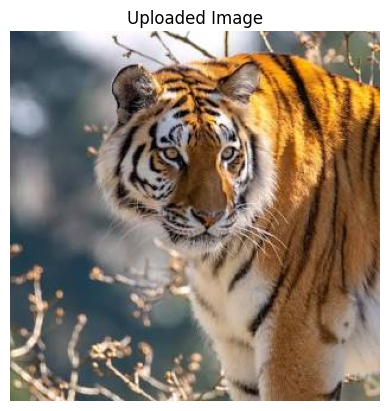

Is the predicted animal 'tiger' correct? (yes/no): yes


In [ ]:
# Step 1: Install necessary libraries
!pip install tensorflow Pillow

# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from IPython.display import display, HTML  # For colored output

# Step 3: Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Step 4: Function to load and preprocess the image
def prepare_image(img_path, target_size=(224, 224)):
    """
    Prepare the image for prediction by resizing and preprocessing.
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Step 5: Function to display image and prediction
def predict_animal(img_path):
    """
    Predict the animal in the image using the pre-trained model.
    """
    # Load and preprocess the image
    img_array = prepare_image(img_path)

    # Make predictions
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Display the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Display predictions with color
    html_content = "<h3 style='color:green;'>Predicted Animal Classes:</h3>"
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        html_content += f"<p style='color:orange;'>Rank {i+1}: {label} ({score:.2f})</p>"

    display(HTML(html_content))

    return decoded_predictions[0][1]  # Return the top prediction label

# Step 6: Function to ask user if the prediction was correct
def check_prediction(img_path):
    """
    Ask the user if the prediction is correct and handle incorrect guesses.
    """
    predicted_label = predict_animal(img_path)

    # Ask user if the prediction was correct with clear colored instructions
    user_input = input(f"Is the predicted animal '{predicted_label}' correct? (yes/no): ").strip().lower()

    if user_input == 'no':
        display(HTML("<h4 style='color:red;'>Please upload the correct photo of the animal.</h4>"))
        correct_photo_upload()

# Step 7: Function to handle incorrect guesses and allow users to upload their own photo
def correct_photo_upload():
    """
    Let the user upload the correct image if the prediction was wrong.
    """
    from google.colab import files
    display(HTML("<h4 style='color:purple;'>Upload the correct photo of the animal:</h4>"))

    # Let the user upload the correct image
    uploaded_files = files.upload()

    for filename, filedata in uploaded_files.items():
        save_user_photo(filename, filedata)

# Step 8: Function to save the user-submitted photo in a folder
def save_user_photo(filename, filedata):
    """
    Save the uploaded user photo in a separate folder for incorrect guesses.
    """
    # Create a folder if it doesn't exist
    if not os.path.exists("user_submissions"):
        os.makedirs("user_submissions")

    save_path = os.path.join("user_submissions", filename)

    # Save the file with binary data
    with open(save_path, "wb") as f:
        f.write(filedata)

    display(HTML(f"<p style='color:green;'>Your submission has been saved as {save_path}. Thank you!</p>"))

# Step 9: Test the function with an image
from google.colab import files

# Upload an image and check prediction
uploaded = files.upload()

for fn in uploaded.keys():
    check_prediction(fn)
